# 
- **Answer Set** : NO. 02
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 96413315

FIR Filter Design by Windowing method using MATLAB

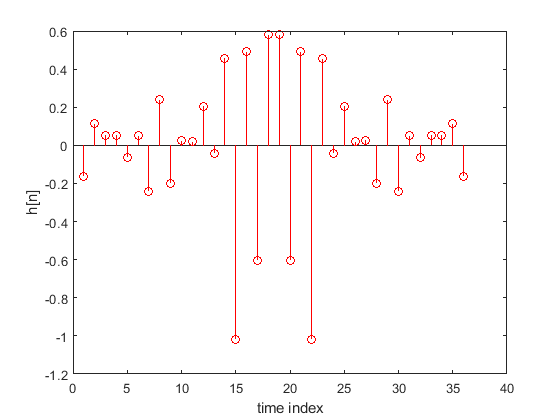

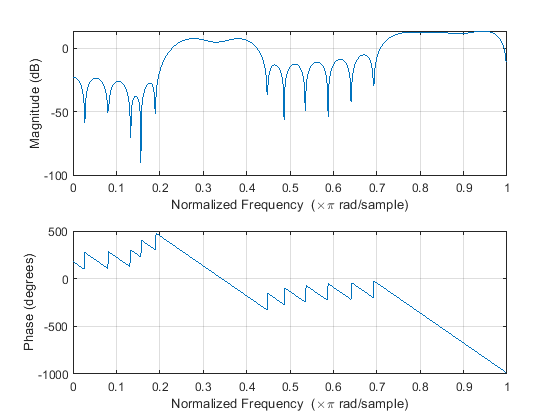

In [2]:
wp1=0.2*pi;
ws1=0.25*pi;
wp2=0.4*pi;
ws2=0.45*pi;
wp3=0.7*pi;
ws3=0.75*pi;
wc1=(ws1+wp1)/2;
wc2=(ws2+wp2)/2;
wc3=(ws3+wp3)/2;
M=1.8*pi/(ws1-wp1);
a=(M-1)/2;
n=0:1:M-1;
hd1=sin(wc1.*(n-a))./(pi.*(n-a));
hd2=sin(wc2.*(n-a))./(pi.*(n-a));
hd3=sin(wc3.*(n-a))./(pi.*(n-a));
hd4=sin(pi.*(n-a))./(pi.*(n-a));
hd=4*hd4-4*hd3+2*hd2-2*hd1;
w=ones(1,M);
h=hd.*w;
figure(1)
freqz(hd);
figure(2)
stem(h,'r')
ylabel('h[n]');xlabel('time index');


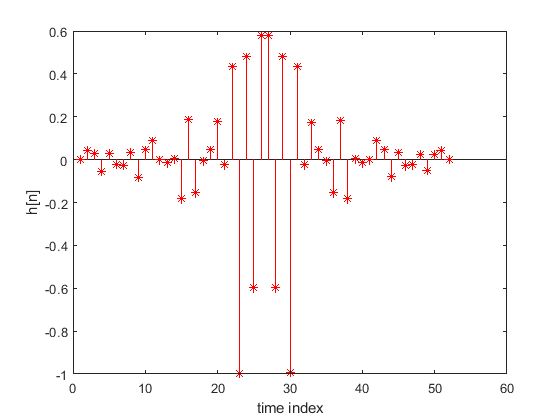

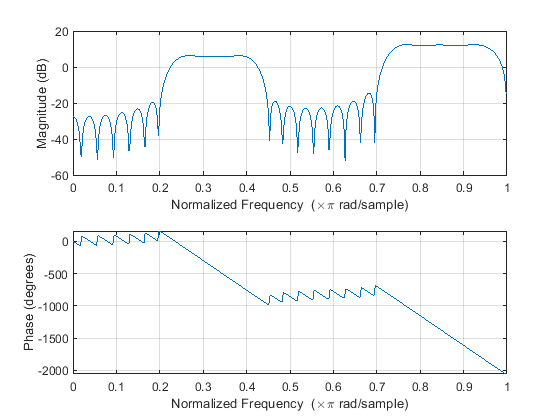

In [4]:
%FREQUENCY
wp1=0.2*pi;
ws1=0.25*pi;
wp2=0.4*pi;
ws2=0.45*pi;
wp3=0.7*pi;
ws3=0.75*pi;
wp4=0.95*pi;
ws4=pi;
wc1=(ws1+wp1)/2;
wc2=(ws2+wp2)/2;
wc3=(ws3+wp3)/2;
wc4=(ws4+wp4)/2;
delta=0.05;
A=-20*log10(delta);
if A>50
beta=0.1102*(A-8.7);
end
if A<21
beta=0;
end
if (A>20 && A<51)
beta=0.5842*(A-21)^0.4+0.07886*(A-21);
end
%1th filter
M1=floor((A-7.95)/(2.285*(ws1-wp1)))+1;
n1=0:1:M1;
f1=(beta*sqrt(1-(1-(2.*n1./(M1-1))).^2));
w1=besseli(0,f1)./(besseli(0,beta));
h1=(sin(wc1.*(n1-M1/2))./(pi*(n1-M1/2))).*w1;
%2th filter
M2=floor((A-7.95)/(2.285*(ws2-wp2)))+1;
n2=0:1:M2;
f2=(beta*sqrt(1-(1-(2.*n2./(M2-1))).^2));
w2=besseli(0,f2)./(besseli(0,beta));
h2=(sin(wc2.*(n2-M2/2))./(pi*(n2-M2/2))).*w2;
%3th filter
M3=floor((A-7.95)/(2.285*(ws3-wp3)))+1;
n3=0:1:M3;
f3=(beta*sqrt(1-(1-(2.*n3./(M3-1))).^2));
w3=besseli(0,f3)./(besseli(0,beta));
h3=(sin(wc3.*(n3-M3/2))./(pi*(n3-M3/2))).*w3;
%4th filter
M4=floor((A-7.95)/(2.285*(ws4-wp4)))+1;
n4=0:1:M4;
f4=(beta*sqrt(1-(1-(2.*n3./(M3-1))).^2));
w4=besseli(0,f4)./(besseli(0,beta));
h4=(sin(wc4.*(n4-M4/2))./(pi*(n4-M4/2))).*w4;
%main filter
h=4*h4-4*h3+2*h2-2*h1;
figure(1)
freqz(h)
figure(2)
stem(h,'r','*')
xlabel('time index');ylabel('h[n]');


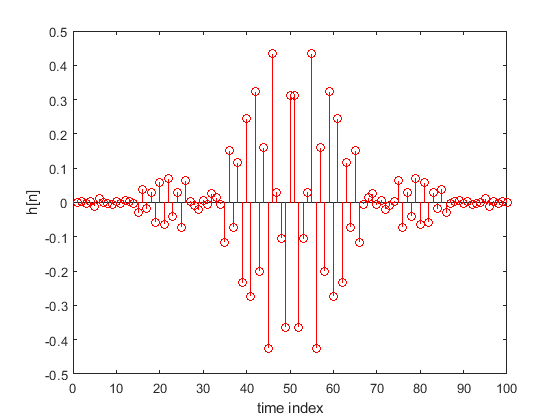

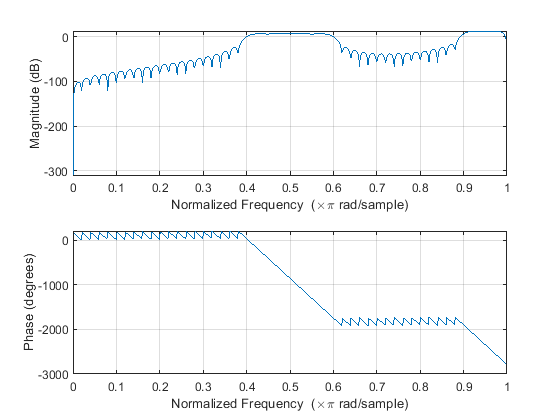

In [5]:
N=100;
P1=20;
P2=10;
P3=15;
Hk1=[zeros(1,P1),2*ones(1,P2),zeros(1,P3),4*ones(1,N/2-P1-P2-P3)];
Hkr=[Hk1,fliplr(Hk1)];
for k=0:floor((N-1)/2)
ang(k+1)=-(N-1)*(pi*k)/N;
end
for k=floor((N-1)/2)+1:N-1
ang(k+1)=(N-1)*(pi*(N-k))/N;
end
Hk= Hkr.*exp(1i.*ang);
h1=ifft(Hk,N);
h=real(h1);
figure(1)
freqz(h)
figure(2)
stem(h,'r')
xlabel('time index');ylabel('h[n]');


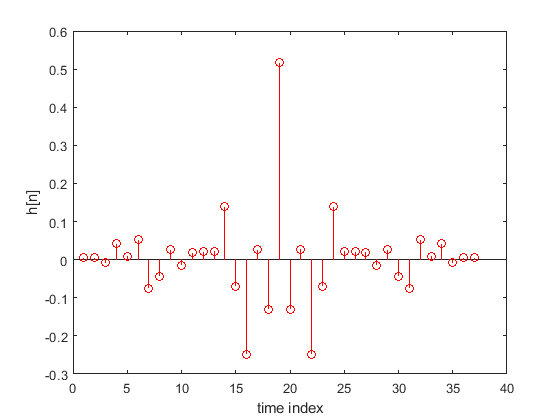

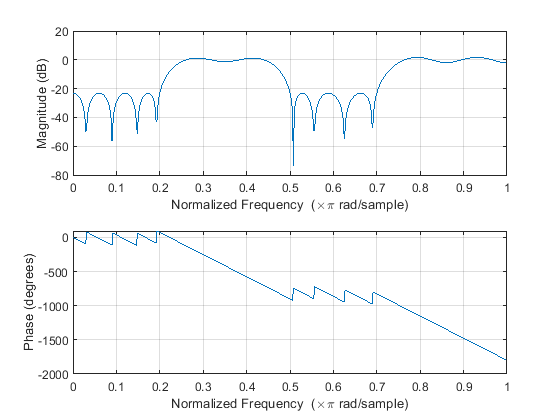

In [7]:
ws1=0.2;
wp1=0.25;
wp2=0.45;
ws2=0.5;
ws3=0.7;
wp3=0.75;
delta1=0.05;
delta2=0.1;
delta3=0.05;
delta4=0.15;
f=[ws1,wp1,wp2,ws2,ws3,wp3];
m=[0,1,0,1]; 
delta=[delta1,delta2,delta3,delta4];
[N,f,m,weights] = firpmord(f,m,delta); 
h=firpm(N,f,m,weights);
figure(1)
freqz(h)
figure(2)
stem(h,'r')
xlabel('time index');ylabel('h[n]')
